## Load Moduls

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from imblearn.pipeline import Pipeline, make_pipeline

import warnings
warnings.filterwarnings('ignore')

## Create Dataset For Training and Calibration

### Load Dataset

In [2]:
raw_train_df = pd.read_csv('./dataset/prepared_dataset/train.csv', index_col = 'SK_ID_CURR')
production_df = pd.read_csv('./dataset/prepared_dataset/test.csv', index_col = 'SK_ID_CURR')

In [3]:
raw_train_df.head()

,AMT_CREDIT_SUM_BUREAU,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,PREV_AMT_PAYMENT,REGION_POPULATION_RELATIVE,AMT_ANNUITY,DAYS_BIRTH,AMT_GOODS_PRICE,PREV_AMT_INSTALMENT,AMT_CREDIT_SUM_DEBT_BUREAU,DAYS_ID_PUBLISH,PREV_AMT_CREDIT,AMT_INCOME_TOTAL,AMT_CREDIT,HOUR_APPR_PROCESS_START,DEF_30_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLAG_EMP_PHONE,FLAG_DOCUMENT_3,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,NAME_INCOME_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,CODE_GENDER,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,481988.565,-3648.0,-637,-1134.0,0.262949,219625.695,0.018801,24700.5,-9461,351000.0,219625.695,245781.0,-2120,179055.0,202500.0,406597.5,10,2.0,0,2.0,2,2,1,1,0,0,Working,WEDNESDAY,Secondary / secondary special,House / apartment,Business Entity,M,1
100003,810000.000,-1186.0,-1188,-828.0,0.622246,1618864.650,0.003541,35698.5,-16765,1129500.0,1618864.650,0.0,-291,1452573.0,270000.0,1293502.5,11,0.0,0,1.0,1,1,1,1,0,0,State servant,MONDAY,Higher education,House / apartment,School,F,0
100004,0.000,-4260.0,-225,-815.0,0.555912,21288.465,0.010032,6750.0,-19046,135000.0,21288.465,0.0,-2531,20106.0,67500.0,135000.0,9,0.0,0,0.0,2,2,1,0,0,0,Working,MONDAY,Secondary / secondary special,House / apartment,Government,M,0
100006,0.000,-9833.0,-3039,-617.0,0.650442,1007153.415,0.008019,29686.5,-19005,297000.0,1007153.415,0.0,-2437,1718644.5,135000.0,312682.5,17,0.0,0,2.0,2,2,1,1,0,0,Working,WEDNESDAY,Secondary / secondary special,House / apartment,Business Entity,F,0
100007,0.000,-4311.0,-3038,-1106.0,0.322738,806127.975,0.028663,21865.5,-19932,513000.0,835985.340,0.0,-3458,999832.5,121500.0,513000.0,11,0.0,1,0.0,2,2,1,0,1,0,Working,THURSDAY,Secondary / secondary special,House / apartment,Religion,M,0


In [4]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 100002 to 456255
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AMT_CREDIT_SUM_BUREAU        307511 non-null  float64
 1   DAYS_REGISTRATION            307511 non-null  float64
 2   DAYS_EMPLOYED                307511 non-null  int64  
 3   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 4   EXT_SOURCE_2                 307511 non-null  float64
 5   PREV_AMT_PAYMENT             307511 non-null  float64
 6   REGION_POPULATION_RELATIVE   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  int64  
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  PREV_AMT_INSTALMENT          307511 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_BUREAU   307511 non-null  float64
 12  DAYS_ID_PUBLISH              307511 non-null  int64  
 13 

### Seperate Training and Calirations

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
CAL_RATIO = 0.1 # take 10% of data to be calibration dataset
TEST_RATIO = 0.3 # take 30% of training data for evaluate model performances
RANDOM = 1

#statification keys
strat_key = ['TARGET']

In [7]:
splitter = StratifiedShuffleSplit(n_splits=1, 
                                 test_size=CAL_RATIO, 
                                 random_state=RANDOM)

for train_index, calibration_index in splitter.split(raw_train_df, raw_train_df['TARGET']):
    train_val_df = raw_train_df.iloc[train_index, :].copy()
    calibration_df = raw_train_df.iloc[calibration_index, :].copy()

In [8]:
#split for training and testing
spliter = StratifiedShuffleSplit(n_splits=1, test_size=TEST_RATIO, random_state=RANDOM)
for train_index, test_index in spliter.split(train_val_df, train_val_df[strat_key]):
    train_df = train_val_df.iloc[train_index, :].copy()
    test_df = train_val_df.iloc[test_index, :].copy()

In [9]:
print('Shape of calibration dataset: ', calibration_df.shape)
print('Shape of training and validation dataset: ', train_df.shape)
print('Shape of testing dataset: ', test_df.shape)

Shape of calibration dataset:  (30752, 33)
Shape of training and validation dataset:  (193731, 33)
Shape of testing dataset:  (83028, 33)


### Define X and y

In [10]:
y_train = train_df.TARGET.copy()
X_train = train_df.drop(columns = 'TARGET').copy()

y_cal = calibration_df.TARGET.copy()
X_cal = calibration_df.drop(columns = 'TARGET').copy()

y_test = test_df.TARGET.copy()
X_test = test_df.drop(columns = 'TARGET').copy()

# Model Buildings Pipeline

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

## Feature Balancer

In [12]:
# Imbalanced Ratio
IR = len(train_df[train_df.TARGET == 1])/len(train_df[train_df.TARGET == 0])
IR

0.08781416346607371

In [13]:
cnum_cols = [
    'AMT_CREDIT_SUM_BUREAU',
    'DAYS_REGISTRATION',
    'DAYS_EMPLOYED',
    'DAYS_LAST_PHONE_CHANGE',
    'EXT_SOURCE_2',
    'PREV_AMT_PAYMENT',
    'REGION_POPULATION_RELATIVE',
    'AMT_ANNUITY',
    'DAYS_BIRTH',
    'AMT_GOODS_PRICE',
    'PREV_AMT_INSTALMENT',
    'AMT_CREDIT_SUM_DEBT_BUREAU',
    'DAYS_ID_PUBLISH',
    'PREV_AMT_CREDIT',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'HOUR_APPR_PROCESS_START',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'LIVE_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE'
]

cat_cols = [
    'FLAG_EMP_PHONE',
    'FLAG_DOCUMENT_3',
    'REG_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_LIVE_CITY',
    'NAME_INCOME_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'NAME_EDUCATION_TYPE',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE',
    'CODE_GENDER'
]

dnum_cols = [
    col for col in X_train.columns if col not in cnum_cols+cat_cols
]

num_cols = cnum_cols + dnum_cols

In [14]:
cat_categories = [ sorted(raw_train_df[col].value_counts().index.to_list()) for col in cat_cols]

In [15]:
# for oversampling
ros = RandomOverSampler(random_state=RANDOM)

# for undersampling
rus = RandomUnderSampler(random_state=RANDOM)

In [16]:
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [17]:
X_train_res.head()

,AMT_CREDIT_SUM_BUREAU,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,PREV_AMT_PAYMENT,REGION_POPULATION_RELATIVE,AMT_ANNUITY,DAYS_BIRTH,AMT_GOODS_PRICE,PREV_AMT_INSTALMENT,AMT_CREDIT_SUM_DEBT_BUREAU,DAYS_ID_PUBLISH,PREV_AMT_CREDIT,AMT_INCOME_TOTAL,AMT_CREDIT,HOUR_APPR_PROCESS_START,DEF_30_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLAG_EMP_PHONE,FLAG_DOCUMENT_3,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,NAME_INCOME_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,CODE_GENDER
0,3350538.0,-5006.0,-3124,-1182.0,0.501604,751515.885,0.035792,31077.0,-10550,697500.0,778590.540,3283065.000,-2640,517162.5,202500.0,780363.0,13,0.0,0,0.0,2,2,1,0,1,1,Working,WEDNESDAY,Higher education,House / apartment,Military,M
1,0.0,-6914.0,-4258,-1342.0,0.407788,593335.350,0.031329,18090.0,-19902,247500.0,593335.350,0.000,-3373,508581.0,90000.0,312840.0,8,0.0,0,1.0,2,2,1,1,0,0,Working,WEDNESDAY,Higher education,House / apartment,Business Entity,F
2,2702434.5,-3846.0,-82,-277.0,0.280496,406242.540,0.002134,37768.5,-19577,913500.0,406242.540,1721416.500,-2990,688500.0,198000.0,1166724.0,7,0.0,0,0.0,3,3,1,0,0,0,Working,FRIDAY,Higher education,House / apartment,School,F
3,0.0,-3528.0,-2777,-441.0,0.706546,76669.155,0.026392,33025.5,-19267,1125000.0,76669.155,0.000,-2812,69102.0,112500.0,1125000.0,9,1.0,1,1.0,2,2,1,0,1,0,Working,TUESDAY,Secondary / secondary special,House / apartment,Transport,M
4,1157130.0,-2709.0,-2531,-1317.0,0.629894,233236.935,0.010032,37575.0,-11180,900000.0,233236.935,225709.155,-766,220648.5,157500.0,1042560.0,7,1.0,0,1.0,2,2,1,1,0,0,Working,FRIDAY,Higher education,House / apartment,Insurance,F


In [18]:
y_train_res.value_counts()

TARGET
0    178092
1    178092
Name: count, dtype: int64

## Feature Encoder

In [19]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

In [20]:
#create class for adding features
class ICode(TransformerMixin):
    """
    Adding New Features, X must be in Pandas DataFrame format
    """
    #initialize function
    def __init__(self, 
                 ordinal_encoder=None, 
                 nominal_encoder=None,
                 ordinal_column=None,
                 ordinal_column_categories=None,
                 nominal_column=None,
                 nominal_column_categories=None,
                 remainder='passthrough'):
        
        super().__init__()
        self.ordinal_encoder = ordinal_encoder
        self.nominal_encoder = nominal_encoder
        self.ordinal_column = ordinal_column
        self.ordinal_column_categories = ordinal_column_categories
        self.nominal_column = nominal_column
        self.nominal_column_categories  = nominal_column_categories
        self.remainder = remainder

        from sklearn.compose import ColumnTransformer

    #fit somethings
    def fit(self, X, y=None):   
        X_train = X.copy()

        #if only nominal encoder
        if self.ordinal_encoder == None:
            self.ohe = self.nominal_encoder(categories = self.nominal_column_categories,
                                            sparse_output = False)
            self.cl = ColumnTransformer([('ohe', self.ohe, self.nominal_column)], 
                                        remainder=self.remainder)

        #if only ordinal encoder
        elif self.nominal_encoder == None:
            self.oe = self.ordinal_encoder(categories = self.ordinal_column_categories)
            self.cl = ColumnTransformer([('oe', self.oe, self.ordinal_column)], 
                                        remainder=self.remainder)
        
        elif (self.nominal_encoder == None) & (self.ordinal_encoder == None):
            pass

        else:
            self.oe = self.ordinal_encoder(categories = self.ordinal_column_categories)
            self.ohe = self.nominal_encoder(categories = self.nominal_column_categories,
                                            sparse_output = False)
    
            self.cl = ColumnTransformer([('oe', self.oe, self.ordinal_column),
                                         ('ohe', self.ohe, self.nominal_column)], 
                                        remainder=self.remainder)
        self.cl.fit(X_train)
        return self

    #transform column
    def transform(self, X, y=None):
        X_test = X.copy()
        
        columns = [col.split('__')[-1] for col in self.cl.get_feature_names_out()]
        
        return pd.DataFrame(self.cl.transform(X_test), columns = columns).astype('float')


    def inverse_transform(self, X, y=None):
        X = X.copy()
        X = self.cl.inverse_transform(X)
        return X

In [21]:
# for weight based model
encoder_w = ICode(nominal_encoder = OneHotEncoder,
                  nominal_column = cat_cols,
                  nominal_column_categories = cat_categories)

# for tree based model
encoder_t = ICode(ordinal_encoder = OrdinalEncoder,
                  ordinal_column = cat_cols,
                  ordinal_column_categories = cat_categories)

In [22]:
test_encoder = Pipeline([('oversampler', ros), ('encoder',encoder_w)])
X_ = test_encoder.fit_transform(X_train, y_train)

## Data Transformation and Scaling Step

### Create Function to Check Normality

### Create Custom Transformer and Scaler Class

In [23]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as OuterPipeline

In [24]:
#create class for adding features
class TranScaler(TransformerMixin):
    """
    Adding New Features, X must be in Pandas DataFrame format
    """
    #initialize function
    def __init__(self,
                 steps = [],
                 remainder = 'passthrough'):
        
        super().__init__()
        self.steps = steps
        self.remainder = remainder

    #fit somethings
    def fit(self, X, y=None):   
        X_train = X.copy()

        self.cl = ColumnTransformer(self.steps, 
                                    remainder=self.remainder)
        self.cl.fit(X_train)
        
        return self

    #transform column
    def transform(self, X, y=None):
        X_test = X.copy()
        
        columns = [col.split('__')[-1] for col in self.cl.get_feature_names_out()]
        
        return pd.DataFrame(self.cl.transform(X_test), columns = columns)

In [25]:
transcaler = TranScaler([('ptf', PowerTransformer(), num_cols)])

In [26]:
transcaler_pipe_ohe = Pipeline([('encoder', encoder_w),
                                ('transcaler', transcaler)])

transcaler_pipe_lb = Pipeline([('encoder', encoder_t),
                               ('transcaler', transcaler)])

X_train_w = transcaler_pipe_ohe.fit_transform(X_train)
X_train_t = transcaler_pipe_lb.fit_transform(X_train)

### Check The Transformation Resuls

In [27]:
X_train_w[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT_SUM_BUREAU,193731.0,-1.063626e-17,1.000003,-1.421561,-1.421561,0.358353,0.764626,3.667425
DAYS_REGISTRATION,193731.0,-7.350025e-17,1.000003,-3.352727,-0.782542,-0.076381,0.742279,2.356076
DAYS_EMPLOYED,193731.0,-4.621273e-17,1.000003,-7.191104,-0.341389,0.130557,0.350993,1.344277
DAYS_LAST_PHONE_CHANGE,193731.0,2.139356e-16,1.000003,-2.148871,-0.810681,-0.122290,0.556237,1.787078
EXT_SOURCE_2,193731.0,1.301659e-16,1.000003,-1.961285,-0.814706,0.118948,0.800770,2.514124
PREV_AMT_PAYMENT,193731.0,-2.947345e-16,1.000003,-2.350244,-0.583016,-0.070299,0.626158,4.319445
REGION_POPULATION_RELATIVE,193731.0,-1.280753e-16,1.000003,-2.240848,-0.865620,0.051609,0.799452,2.310594
AMT_ANNUITY,193731.0,-2.792569e-16,1.000003,-7.235740,-0.692246,0.039001,0.678737,5.863137
DAYS_BIRTH,193731.0,1.296029e-15,1.000003,-1.940128,-0.849197,0.007299,0.805662,2.188279
AMT_GOODS_PRICE,193731.0,1.150184e-16,1.000003,-5.080917,-0.835774,-0.013183,0.601377,4.215214


## Select Model and Evaluation Strategy

### Load Selected Model
Model that might Suit for this task are:
1. Logistic Regression (Baseline)
2. Support Vector Machine Classifier
3. Random Forest Classifier
4. XGBoost Classifier
5. Neural Networks

In [28]:
#import Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### Select Metric of Evaluation

In [29]:
from sklearn.metrics \
import (
    #scorer matrix
    make_scorer,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    confusion_matrix,
    average_precision_score,
    roc_auc_score,

    #curve
    precision_recall_curve,
    roc_curve,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay,

    #reporting
    classification_report
)

#create core
auc_roc = make_scorer(roc_auc_score)
avg_precision = make_scorer(average_precision_score)
f1 = make_scorer(f1_score)
precision = make_scorer(precision_score)
recall = make_scorer(recall_score)
accuracy = make_scorer(accuracy_score)

### Create Function to Evaluate Model Performance

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_binary_classification(model, 
                                   X_train=X_train,
                                   X_test=X_test,
                                   y_train=y_train, 
                                   y_test=y_test):
    """
    Evaluate binary classification performance on both training and testing data.
    
    Parameters:
    y_train (array-like): True binary labels for training data.
    y_test (array-like): True binary labels for testing data.
    y_pred_train (array-like): Predicted probabilities or scores for training data.
    y_pred_test (array-like): Predicted probabilities or scores for testing data.
    
    Returns:
    None: Displays the plots and metrics tables.
    """
    y_pred_train = model.predict_proba(X_train)[:,-1]
    y_pred_test = model.predict_proba(X_test)[:,-1]
    
    def calculate_metrics(y_true, y_pred):
        y_pred_labels = (y_pred >= 0.5).astype(int)
        roc_auc_val = roc_auc_score(y_true, y_pred)
        avg_precision_val = average_precision_score(y_true, y_pred)
        accuracy_val = accuracy_score(y_true, y_pred_labels)
        precision_val = precision_score(y_true, y_pred_labels)
        recall_val = recall_score(y_true, y_pred_labels)
        f1_val = f1_score(y_true, y_pred_labels)
        return {
            "roc_auc": roc_auc_val,
            "avg_precision" : avg_precision_val,
            "accuracy": accuracy_val,
            "precision": precision_val,
            "recall": recall_val,
            "f1": f1_val,
            "confusion_matrix": confusion_matrix(y_true, y_pred_labels)
        }
    
    # Calculate metrics for training and testing data
    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test)
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # ROC AUC Curve (Training vs Testing) using RocCurveDisplay
    RocCurveDisplay.from_estimator(model, X_train, y_train, ax=axes[0, 0], name='Train ROC')
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[0, 0], name='Test ROC', color='green')
    axes[0, 0].set_title('Receiver Operating Characteristic (ROC)')

    # Precision-Recall Curve (Training vs Testing) using PrecisionRecallDisplay
    PrecisionRecallDisplay.from_estimator(model, X_train, y_train, ax=axes[0, 1], name='Train PR')
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=axes[0, 1], name='Test PR', color='green')
    axes[0, 1].set_title('Precision-Recall Curve')

    # Confusion Matrix (Testing Data) using ConfusionMatrixDisplay
    ConfusionMatrixDisplay(test_metrics["confusion_matrix"]).plot(ax=axes[1, 0], cmap='Blues')
    axes[1, 0].set_title('Confusion Matrix (Test Data)')

    # Metrics Table (Training and Testing Data)
    metrics_table = [
        ['Metric', 'Train', 'Test'],
        ['AUC (ROC)', f'{train_metrics["roc_auc"]:.2f}', f'{test_metrics["roc_auc"]:.2f}'],
        ['Avg Precision', f'{train_metrics["avg_precision"]:.2f}', f'{test_metrics["avg_precision"]:.2f}'],
        ['Precision', f'{train_metrics["precision"]:.2f}', f'{test_metrics["precision"]:.2f}'],
        ['Recall', f'{train_metrics["recall"]:.2f}', f'{test_metrics["recall"]:.2f}'],
        ['F1 Score', f'{train_metrics["f1"]:.2f}', f'{test_metrics["f1"]:.2f}'],
        ['Accuracy', f'{train_metrics["accuracy"]:.2f}', f'{test_metrics["accuracy"]:.2f}']
    ]
    
    axes[1, 1].axis('off')
    table = axes[1, 1].table(cellText=metrics_table, colLabels=None, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    axes[1, 1].set_title('Classification Metrics', fontsize=14)
    
    plt.tight_layout()
    plt.show()

### Refit Strategy

In [31]:
#scoring = [roc_auc_score, average_precision_score, precision_score, recall_score, f1_score]
scoring = ['roc_auc', 'average_precision', 'precision', 'recall', 'f1', 'accuracy']
refit_strategy = 'f1'

### Cross Validation

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(3,
                                  random_state=RANDOM)

### Create Plain Pipeline For Model

In [33]:
plain_weight_based_preprocess_pipe = Pipeline([
    ('encoder', encoder_w),
    ('transcaler', transcaler)
])

plain_info_based_preprocess_pipe = Pipeline([
    ('encoder', encoder_t)
])

# Fit The First Time (No Hyperparameter Tuning)

## Logistic Regression

In [36]:
logit_md = LogisticRegression(random_state=RANDOM,
                              class_weight = 'balanced')
plain_lg = OuterPipeline([
    ('preprocessor', plain_weight_based_preprocess_pipe),
    ('model', logit_md)
])

plain_lg

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('encoder',
                                  <__main__.ICode object at 0x000001E5B36DFD40>),
                                 ('transcaler',
                                  <__main__.TranScaler object at 0x000001E5B404B2F0>)])),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=1))])

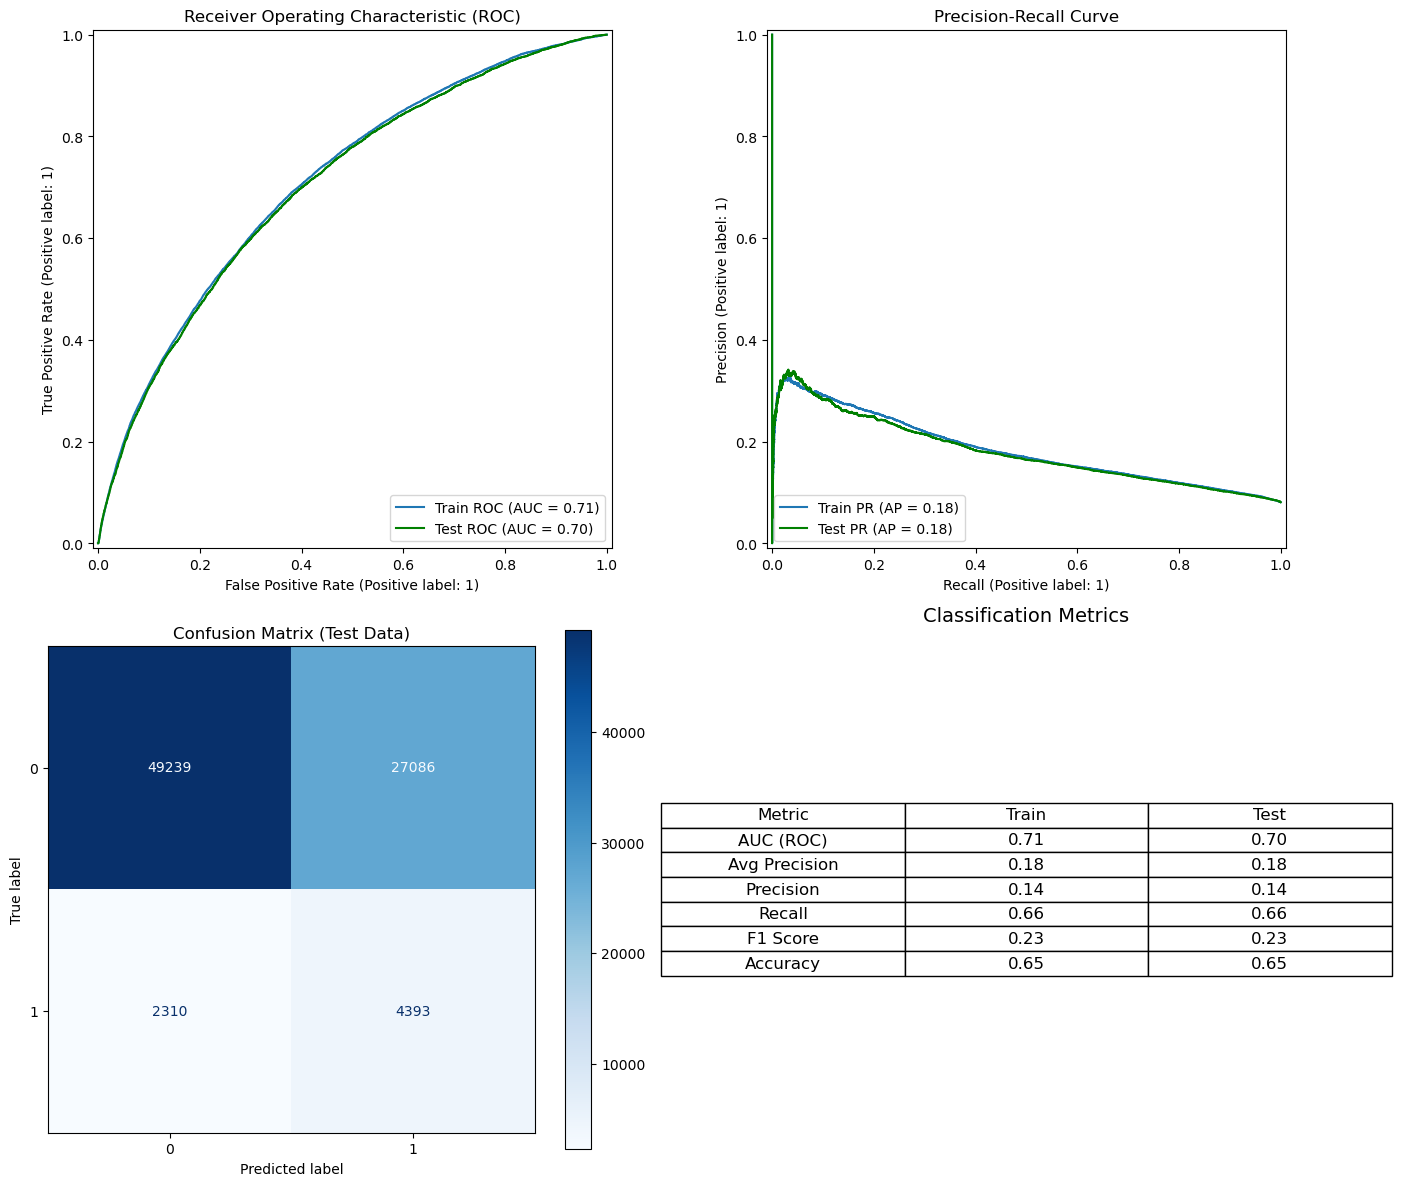

In [37]:
plain_lg.fit(X_train, y_train)

evaluate_binary_classification(plain_lg)

## Random Forest

In [38]:
rf_md = RandomForestClassifier(random_state=RANDOM,
                               class_weight = 'balanced')
plain_rf = OuterPipeline([
    ('preprocessor', plain_info_based_preprocess_pipe),
    ('model', rf_md)
])

plain_rf

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('encoder',
                                  <__main__.ICode object at 0x000001E5B3FD1B50>)])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=1))])

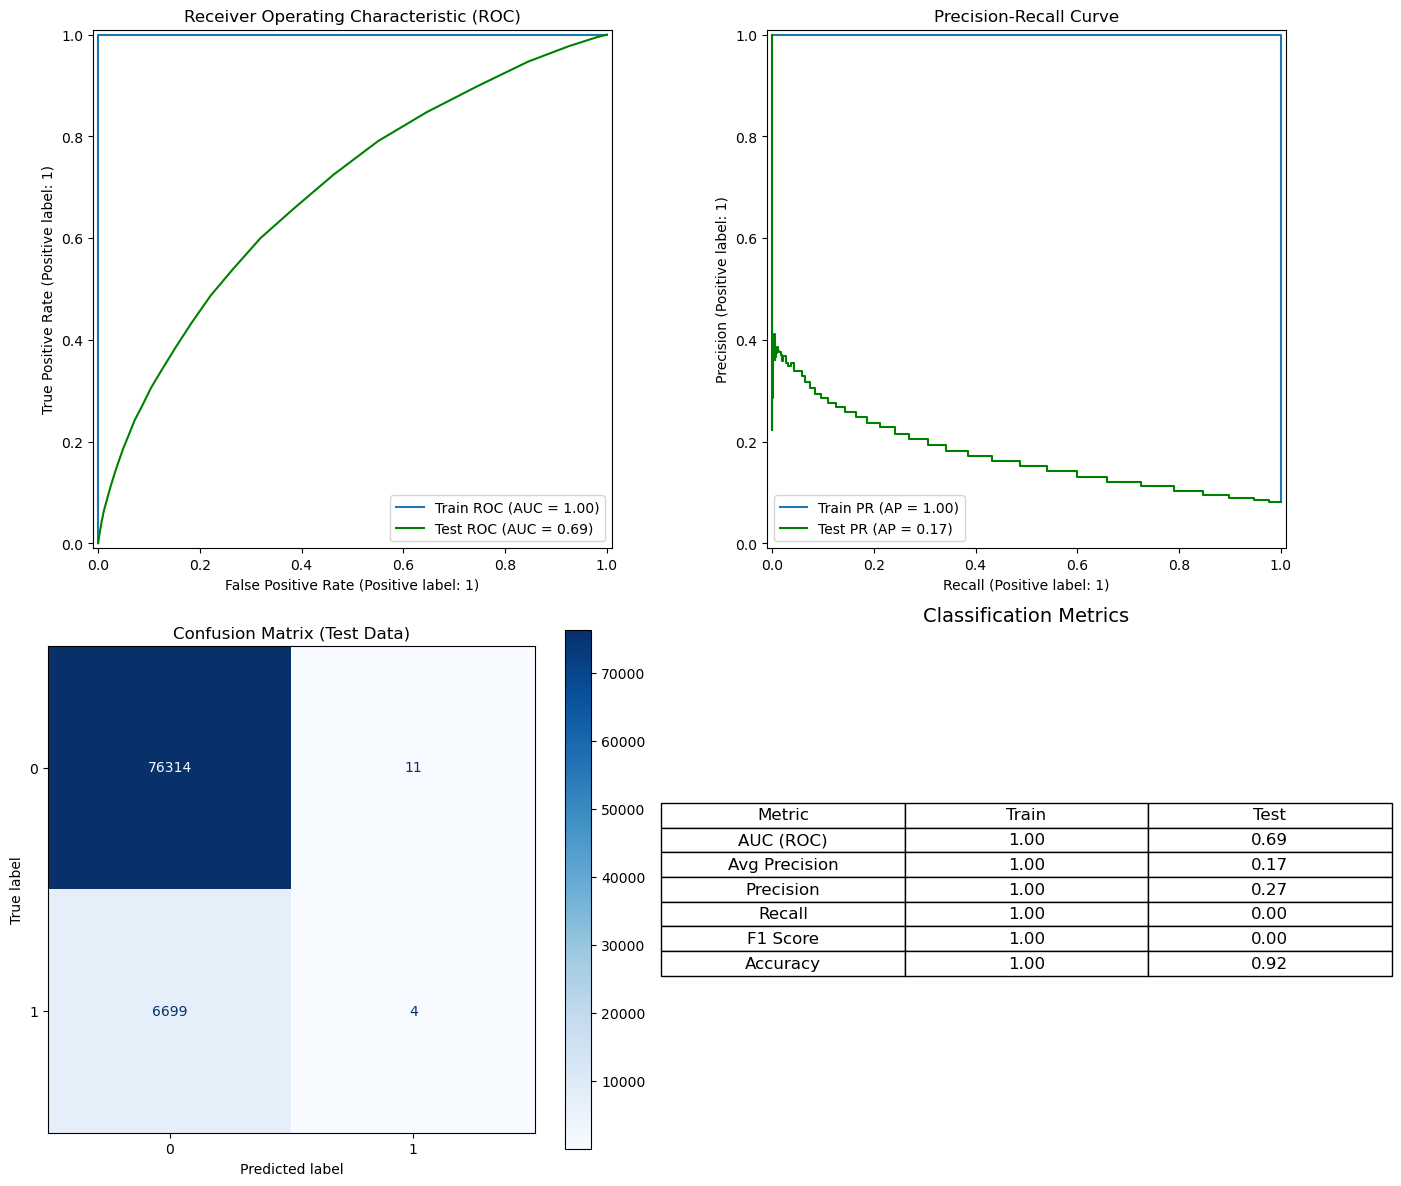

In [39]:
plain_rf.fit(X_train, y_train)

evaluate_binary_classification(plain_rf)

## AdaBoost

In [40]:
ada_md = AdaBoostClassifier(random_state=RANDOM)
plain_ada = OuterPipeline([
    ('preprocessor', plain_info_based_preprocess_pipe),
    ('model', ada_md)
])

plain_ada

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('encoder',
                                  <__main__.ICode object at 0x000001E5B3FD1B50>)])),
                ('model', AdaBoostClassifier(random_state=1))])

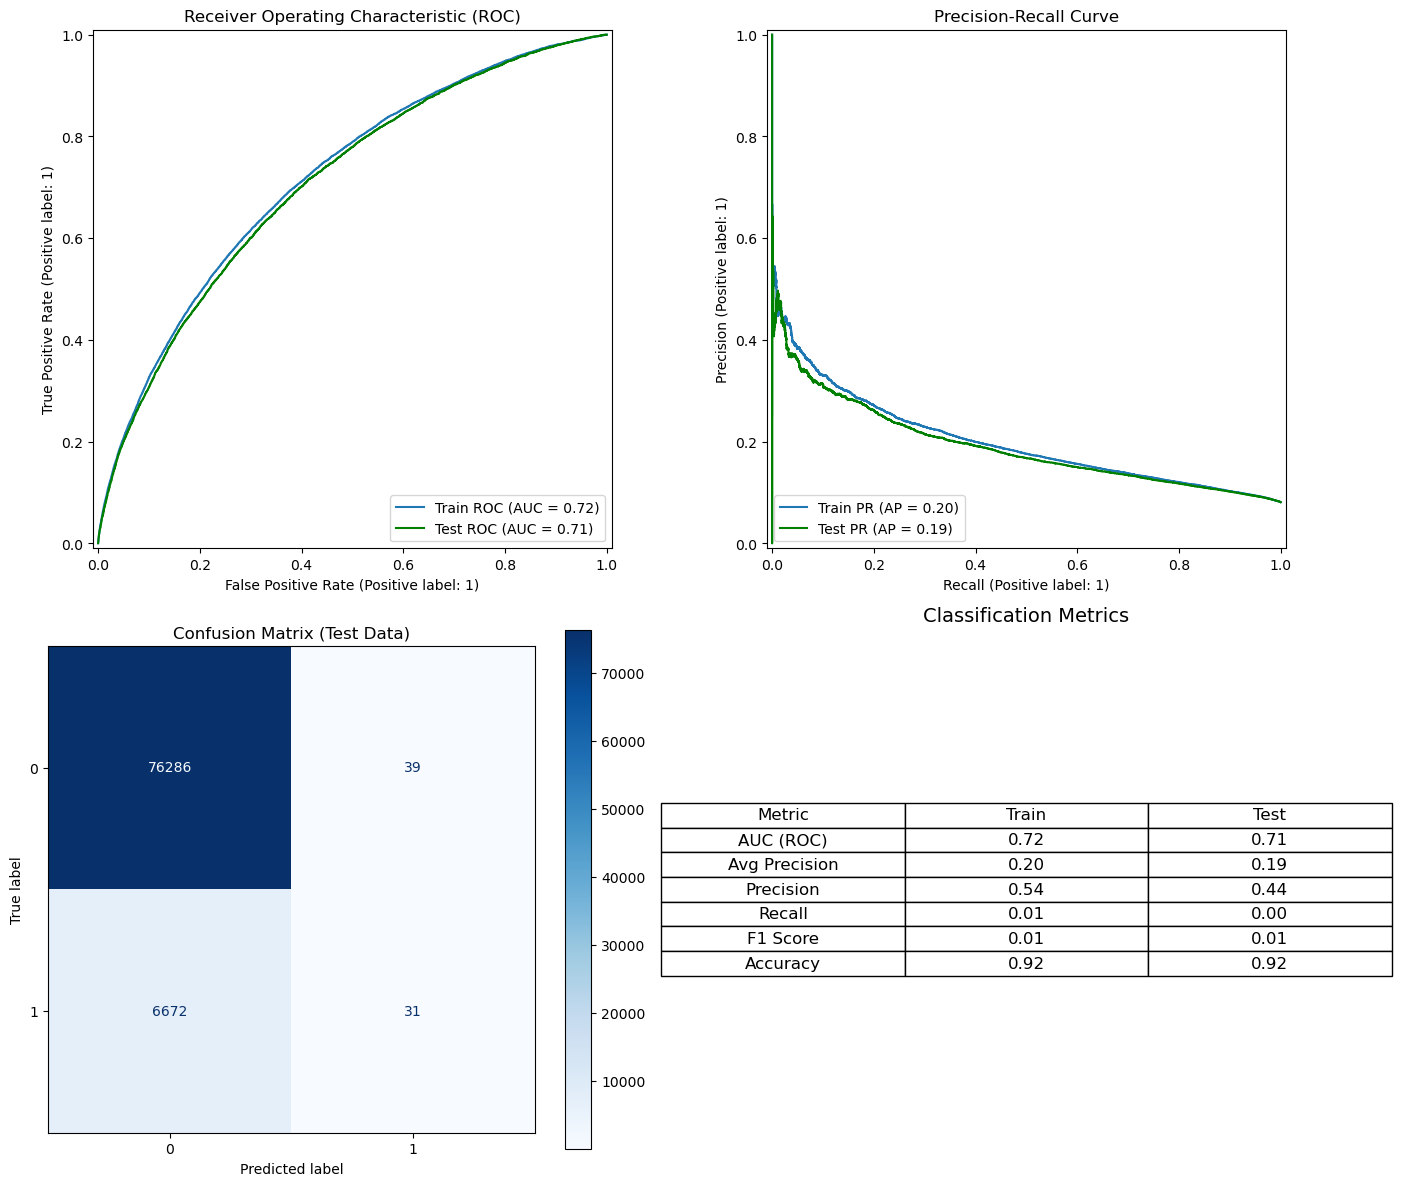

In [41]:
plain_ada.fit(X_train, y_train)

evaluate_binary_classification(plain_ada)

# Hyperparameter Tuning On The Best Model

In [34]:
lg_md = LogisticRegression(random_state=RANDOM, solver = 'saga')
lg1 = OuterPipeline([
    ('encoder', encoder_w),
    ('scaler', MinMaxScaler()),
    ('model', lg_md)
])


lg2_md = LogisticRegression(random_state=RANDOM, solver = 'saga')
lg2 = Pipeline([
    ('ros', ros),
    ('encoder', encoder_w),
    ('scaler', MinMaxScaler()),
    ('model', lg2_md)
])

lg3_md = LogisticRegression(random_state=RANDOM, solver = 'saga')
lg3 = Pipeline([
    ('rus', rus),
    ('ros', ros),
    ('encoder', encoder_w),
    ('scaler', MinMaxScaler()),
    ('model', lg3_md)
])

In [35]:
# Create Hyperparameters
class_weights = ['balanced']+[{0:i, 1:1-i} for i in np.linspace(0.1, 0.9, 3)]
penalty = [None, 'l1', 'l2']
sampling_strategy_rus = [0.1, 0.12]
sampling_strategy_ros = [0.15, 0.2]


lg1_params = {
    'model__class_weight' : class_weights,
    'model__penalty' : penalty,
}

lg2_params = {
    'ros__sampling_strategy' : sampling_strategy_ros,
    'model__class_weight' : class_weights,
    'model__penalty' : penalty,
}

lg3_params = {
    'rus__sampling_strategy' : sampling_strategy_rus,
    'ros__sampling_strategy' : sampling_strategy_ros,
    'model__class_weight' : class_weights,
    'model__penalty' : penalty,
}

### Logistic Regression 1

In [36]:
from sklearn.model_selection import GridSearchCV

In [45]:
lg1_grid = GridSearchCV(lg1,
                        param_grid = lg1_params,
                        scoring = scoring,
                        refit = refit_strategy,
                        cv = splitter,
                        verbose=1,
                        n_jobs=-1)

lg1_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=1, test_size=None,
            train_size=None),
             estimator=Pipeline(steps=[('encoder',
                                        <__main__.ICode object at 0x000001E5B36DFD40>),
                                       ('scaler', MinMaxScaler()),
                                       ('model',
                                        LogisticRegression(random_state=1,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced', {0: 0.1, 1: 0.9},
                                                 {0: 0.5, 1: 0.5},
                                                 {0: 0.9,
                                                  1: 0.09999999999999998}],
                         'model__penalty': [None, 'l1', 'l2']},
             refit='f1',
             scoring=['roc_auc', 'average_precision', 'precision', 'recall',
                      'f1', 'accuracy'],
             verbose=1)

In [46]:
lg1_grid_cv_results = pd.DataFrame(lg1_grid.cv_results_)
#plain_rf_grid_cv_results.to_csv('./plain_rf_grid_cv_results.csv')

lg1_grid.best_params_

{'model__class_weight': {0: 0.1, 1: 0.9}, 'model__penalty': None}

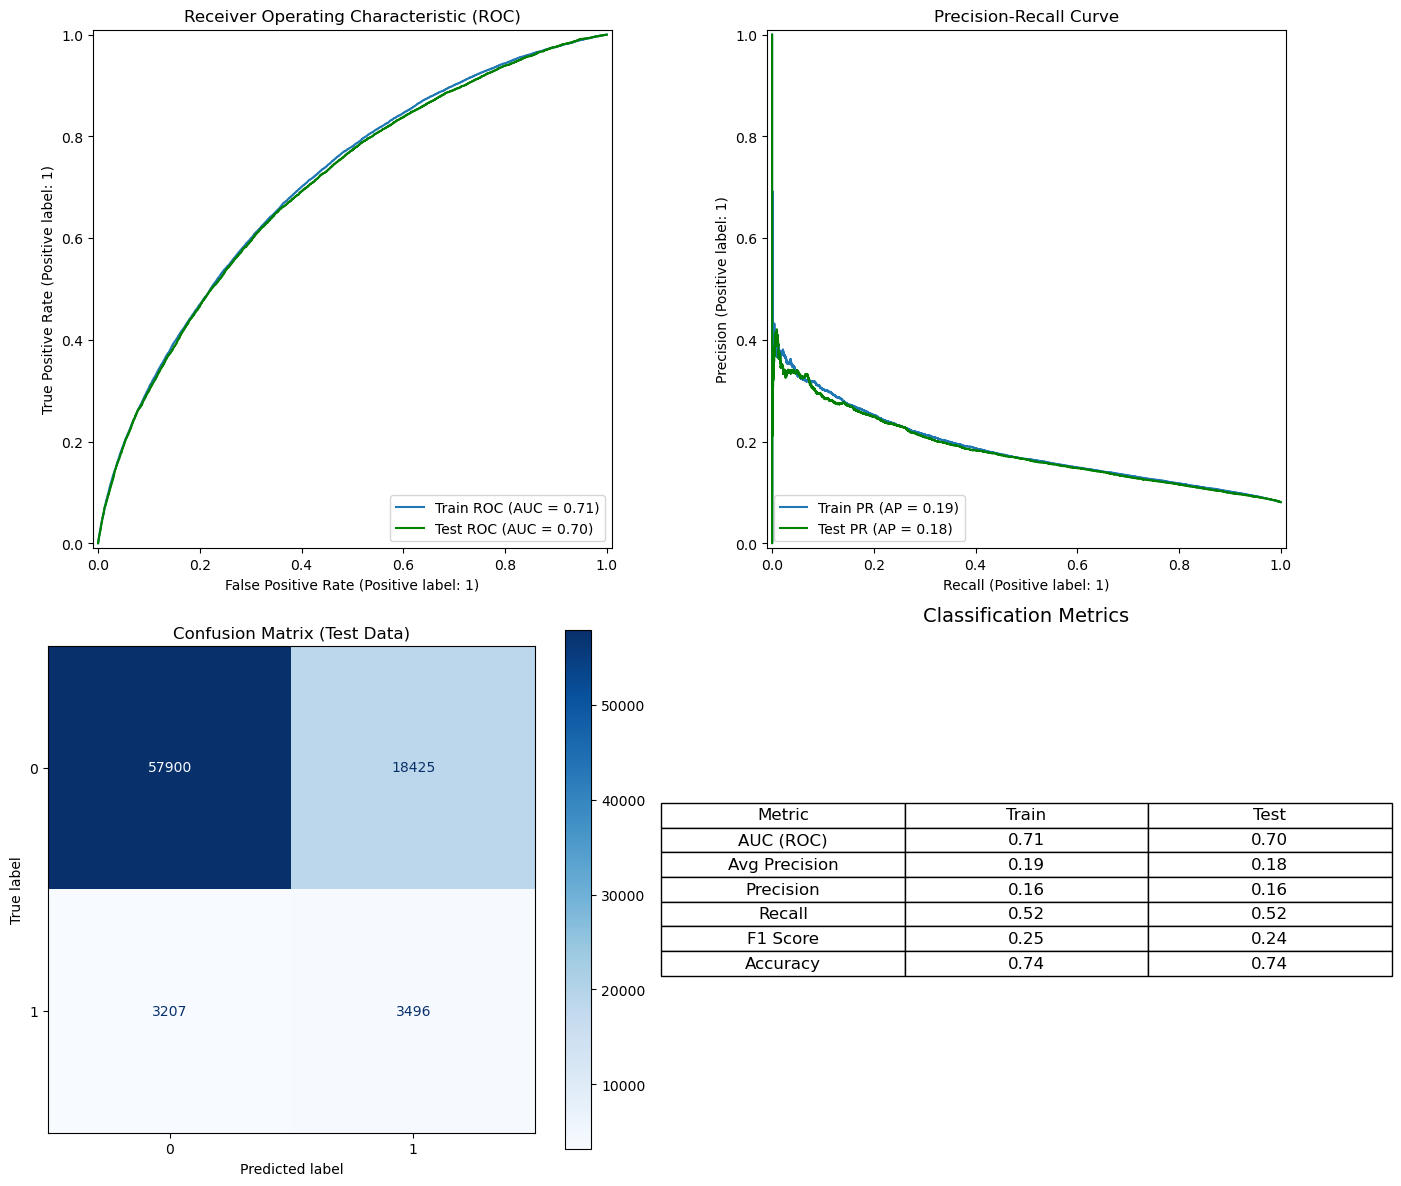

In [42]:
evaluate_binary_classification(lg1_grid)

## Logistic Regression 2

In [47]:
lg2_grid = GridSearchCV(lg2,
                        param_grid = lg2_params,
                        scoring = scoring,
                        refit = refit_strategy,
                        cv = splitter,
                        verbose=1,
                        n_jobs=-1)

lg2_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=1, test_size=None,
            train_size=None),
             estimator=Pipeline(steps=[('ros',
                                        RandomOverSampler(random_state=1)),
                                       ('encoder',
                                        <__main__.ICode object at 0x0000017DFEF2AE70>),
                                       ('scaler', MinMaxScaler()),
                                       ('model',
                                        LogisticRegression(random_state=1,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced', {0: 0.1, 1: 0.9},
                                                 {0: 0.5, 1: 0.5},
                                                 {0: 0.9,
                                                  1: 0.09999999999999998}],
                         'model__penalty': [None, 'l1', 'l2'],
                         'ros__sampling_strategy': [0.15, 0.2]},
             refit='f1',
             scoring=['roc_auc', 'average_precision', 'precision', 'recall',
                      'f1', 'accuracy'],
             verbose=1)

In [48]:
lg2_grid_cv_results = pd.DataFrame(lg2_grid.cv_results_)
#plain_rf_grid_cv_results.to_csv('./plain_rf_grid_cv_results.csv')

lg2_grid.best_params_

{'model__class_weight': 'balanced',
 'model__penalty': None,
 'ros__sampling_strategy': 0.2}

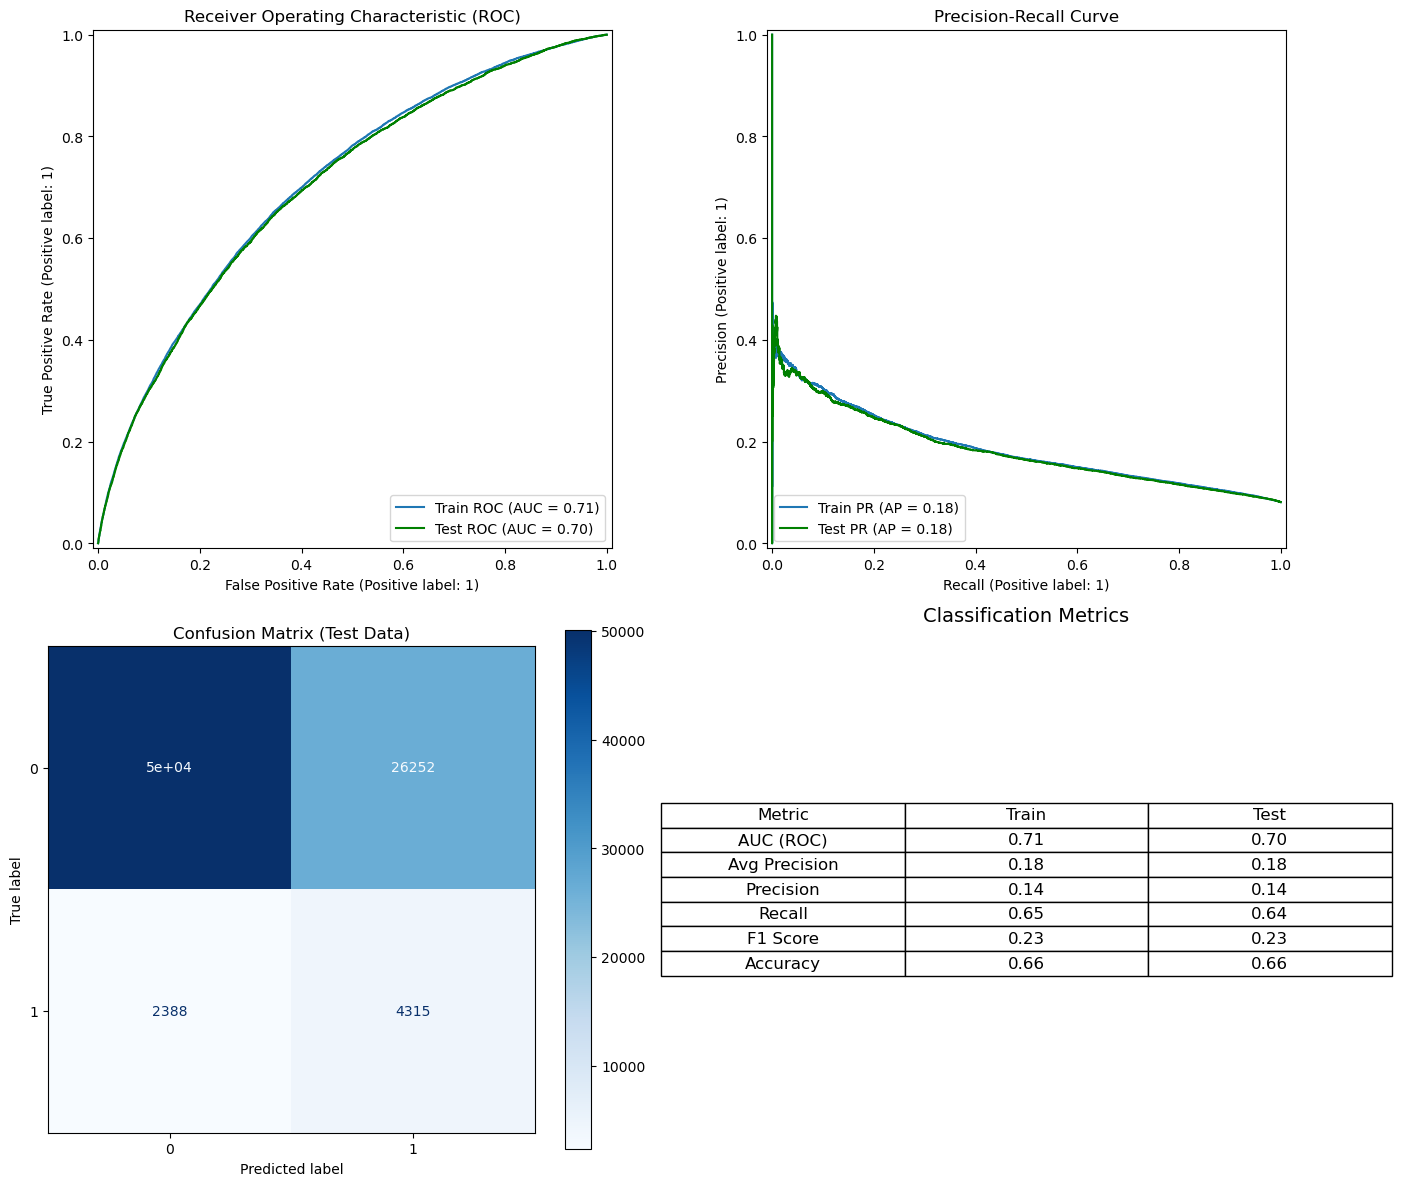

In [43]:
evaluate_binary_classification(lg2_grid)

## Logistic Regression 3

In [50]:
lg3_grid = GridSearchCV(lg3,
                        param_grid = lg3_params,
                        scoring = scoring,
                        refit = refit_strategy,
                        cv = splitter,
                        verbose=1,
                        n_jobs=-1)

lg3_grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=1, test_size=None,
            train_size=None),
             estimator=Pipeline(steps=[('rus',
                                        RandomUnderSampler(random_state=1)),
                                       ('ros',
                                        RandomOverSampler(random_state=1)),
                                       ('encoder',
                                        <__main__.ICode object at 0x0000017DFEF2AE70>),
                                       ('scaler', MinMaxScaler()),
                                       ('model',
                                        LogisticRegression(random_state=1,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced', {0: 0.1, 1: 0.9},
                                                 {0: 0.5, 1: 0.5},
                                                 {0: 0.9,
                                                  1: 0.09999999999999998}],
                         'model__penalty': [None, 'l1', 'l2'],
                         'ros__sampling_strategy': [0.15, 0.2],
                         'rus__sampling_strategy': [0.1, 0.12]},
             refit='f1',
             scoring=['roc_auc', 'average_precision', 'precision', 'recall',
                      'f1', 'accuracy'],
             verbose=1)

In [51]:
lg3_grid_cv_results = pd.DataFrame(lg3_grid.cv_results_)
#plain_rf_grid_cv_results.to_csv('./plain_rf_grid_cv_results.csv')

lg3_grid.best_params_

{'model__class_weight': 'balanced',
 'model__penalty': 'l1',
 'ros__sampling_strategy': 0.2,
 'rus__sampling_strategy': 0.1}

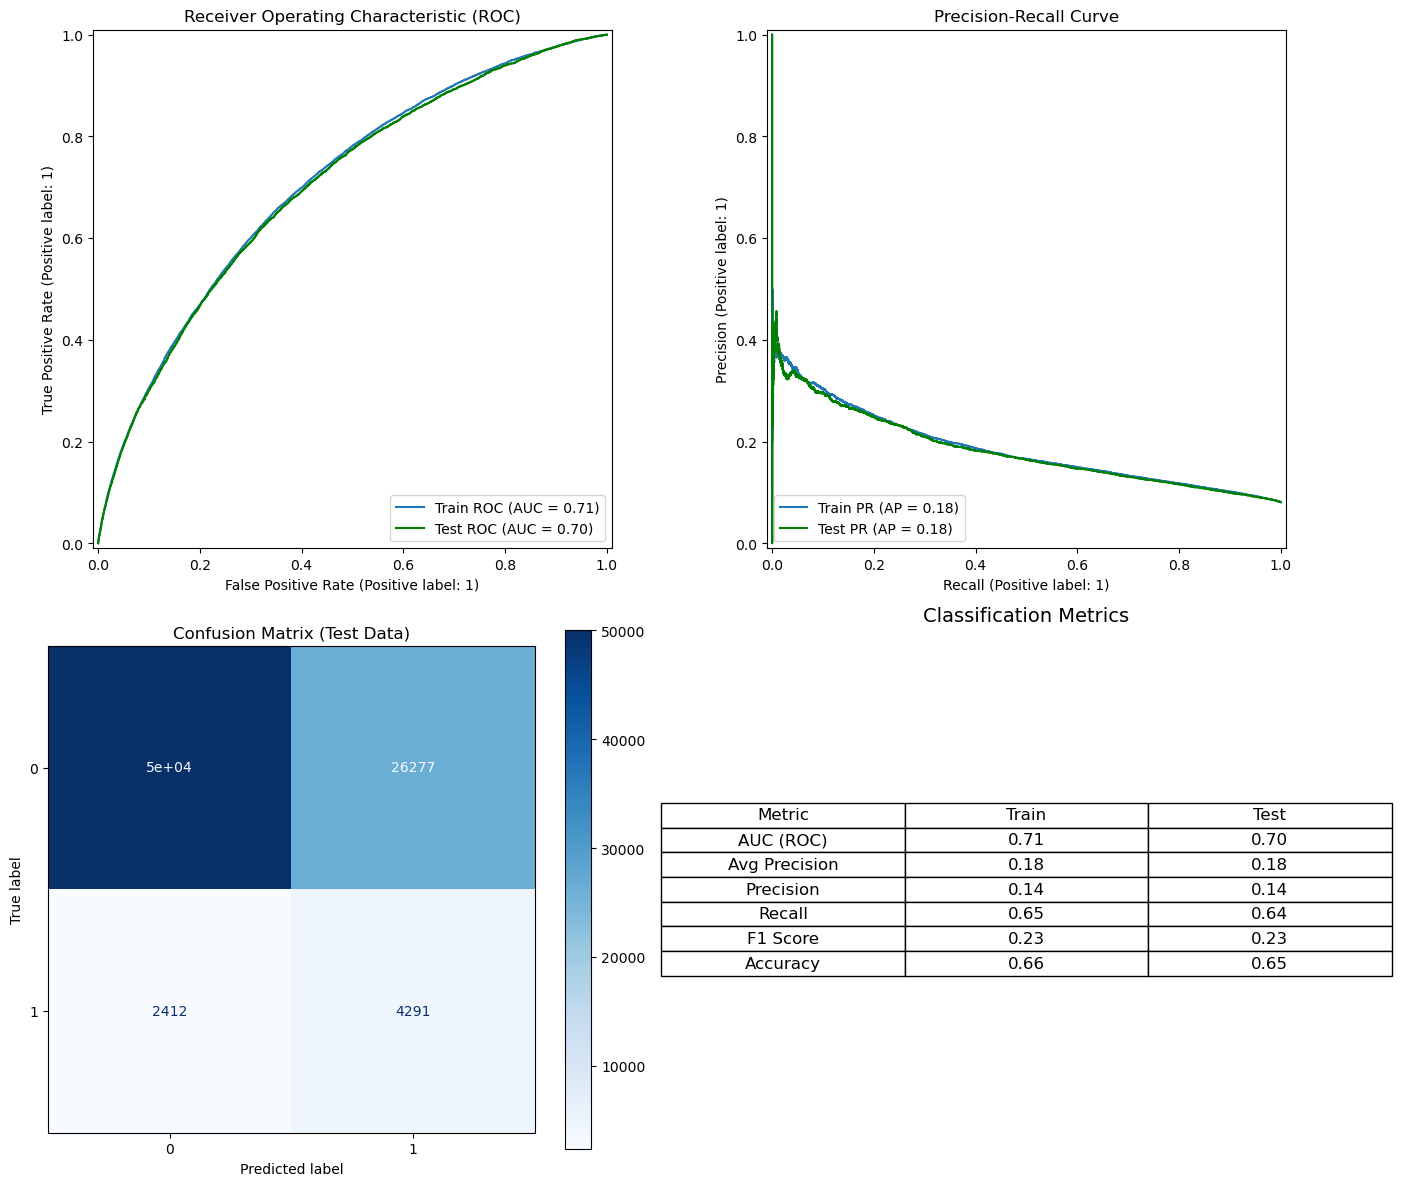

In [44]:
evaluate_binary_classification(lg3_grid)

# Save Models

In [37]:
import pickle

In [52]:
# Random Forest
with open('./model/lg1_grid.pkl', 'wb') as f:
    pickle.dump(lg1_grid, f)

In [53]:
# Random Forest
with open('./model/lg2_grid.pkl', 'wb') as f:
    pickle.dump(lg2_grid, f)

In [54]:
# Random Forest
with open('./model/lg3_grid.pkl', 'wb') as f:
    pickle.dump(lg3_grid, f)

# Load Models

In [38]:
with open('./model/lg1_grid.pkl', 'rb') as f:
    lg1_grid = pickle.load(f)

In [39]:
with open('./model/lg2_grid.pkl', 'rb') as f:
    lg2_grid = pickle.load(f)

In [40]:
with open('./model/lg3_grid.pkl', 'rb') as f:
    lg3_grid = pickle.load(f)

# Model Interpretation

## Weight (Importances)

In [41]:
l = LogisticRegression()

test_encoder = Pipeline([('encoder',encoder_w), ('model', l)])
test_encoder.fit(X_train, y_train)

Pipeline(steps=[('encoder', <__main__.ICode object at 0x00000212D32FF140>),
                ('model', LogisticRegression())])

In [42]:
coeff = lg2_grid.best_estimator_['model'].coef_
importances_score = np.abs(coeff)
features_names = test_encoder['model'].feature_names_in_

In [43]:
#save results in Pandas DataFrame
feature_impact_df  = pd.DataFrame(np.concatenate([np.array(coeff).reshape(-1,1), 
                                                       np.array(features_names).reshape(-1,1)], axis=1), 
                                       columns=['impact_magnitude','features'])
feature_impact_df.impact_magnitude = feature_impact_df.impact_magnitude.astype('float64')

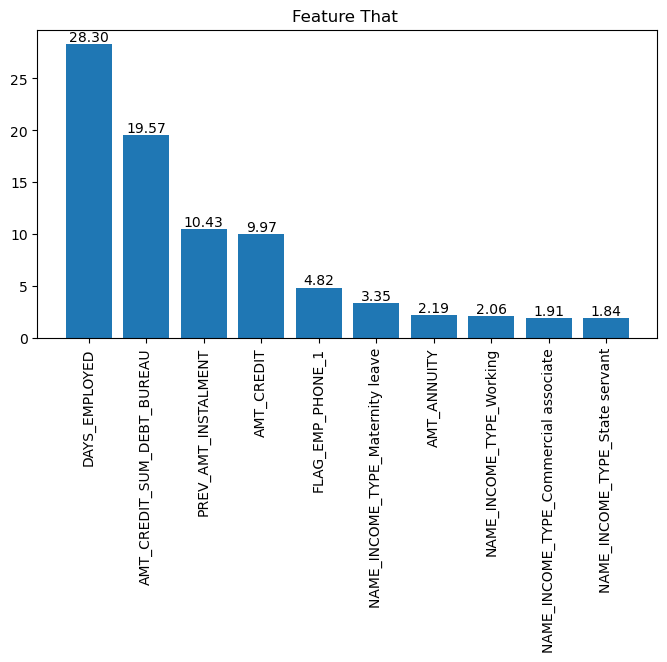

In [44]:
f, x = plt.subplots(1,1, figsize=(8,4))

plot_feature_impact_df = feature_impact_df.sort_values(by='impact_magnitude', ascending=False).head(10)

bars = plt.bar(plot_feature_impact_df.features, plot_feature_impact_df.impact_magnitude, axes=x)
plt.xticks(rotation=90)
plt.title("Feature That ")

# Add annotations to display the values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height:.2f}', ha='center', va='bottom')

plt.show()


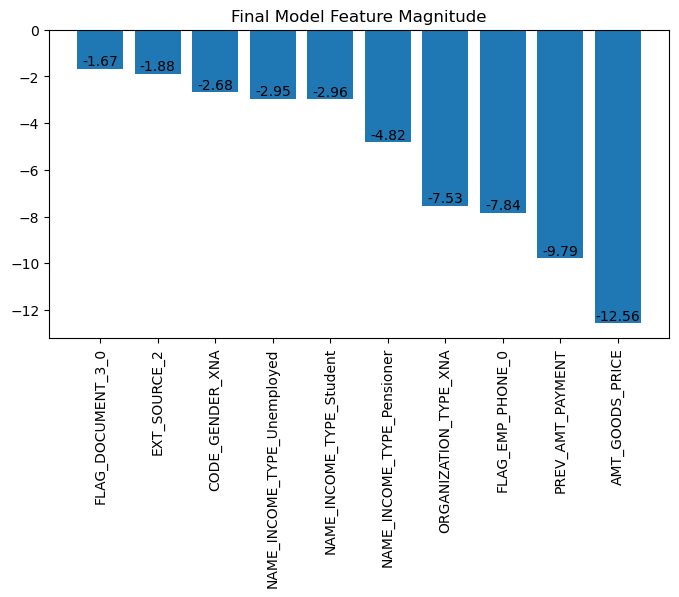

In [45]:
f, x = plt.subplots(1,1, figsize=(8,4))

plot_feature_impact_df = feature_impact_df.sort_values(by='impact_magnitude', ascending=False).tail(10)

bars = plt.bar(plot_feature_impact_df.features, plot_feature_impact_df.impact_magnitude, axes=x)
plt.xticks(rotation=90)
plt.title("Final Model Feature Magnitude")

# Add annotations to display the values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height:.2f}', ha='center', va='bottom')

plt.show()


## Partial Dependece Plot

In [85]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_partial_dependence_with_hue(final_model_calibrated, X, features, grid_resolution=50, figsize=(10,6), 
                                     kind='average', categorical_features = None) :
    fig, ax = plt.subplots(figsize=figsize)  # Set the figure size

    display = PartialDependenceDisplay.from_estimator(
        final_model_calibrated, 
        X, 
        features=features, 
        grid_resolution=grid_resolution, 
        ax=ax, kind=kind, categorical_features=categorical_features
    )

    plt.suptitle("Partial Dependence Plot", size=20)
    plt.tight_layout()
    plt.show()

In [86]:
for i, c in enumerate(X_test.columns):
    print([i, c])

[0, 'AMT_CREDIT_SUM_BUREAU']
[1, 'DAYS_REGISTRATION']
[2, 'DAYS_EMPLOYED']
[3, 'DAYS_LAST_PHONE_CHANGE']
[4, 'EXT_SOURCE_2']
[5, 'PREV_AMT_PAYMENT']
[6, 'REGION_POPULATION_RELATIVE']
[7, 'AMT_ANNUITY']
[8, 'DAYS_BIRTH']
[9, 'AMT_GOODS_PRICE']
[10, 'PREV_AMT_INSTALMENT']
[11, 'AMT_CREDIT_SUM_DEBT_BUREAU']
[12, 'DAYS_ID_PUBLISH']
[13, 'PREV_AMT_CREDIT']
[14, 'AMT_INCOME_TOTAL']
[15, 'AMT_CREDIT']
[16, 'HOUR_APPR_PROCESS_START']
[17, 'DEF_30_CNT_SOCIAL_CIRCLE']
[18, 'LIVE_CITY_NOT_WORK_CITY']
[19, 'OBS_30_CNT_SOCIAL_CIRCLE']
[20, 'REGION_RATING_CLIENT']
[21, 'REGION_RATING_CLIENT_W_CITY']
[22, 'FLAG_EMP_PHONE']
[23, 'FLAG_DOCUMENT_3']
[24, 'REG_CITY_NOT_WORK_CITY']
[25, 'REG_CITY_NOT_LIVE_CITY']
[26, 'NAME_INCOME_TYPE']
[27, 'WEEKDAY_APPR_PROCESS_START']
[28, 'NAME_EDUCATION_TYPE']
[29, 'NAME_HOUSING_TYPE']
[30, 'ORGANIZATION_TYPE']
[31, 'CODE_GENDER']


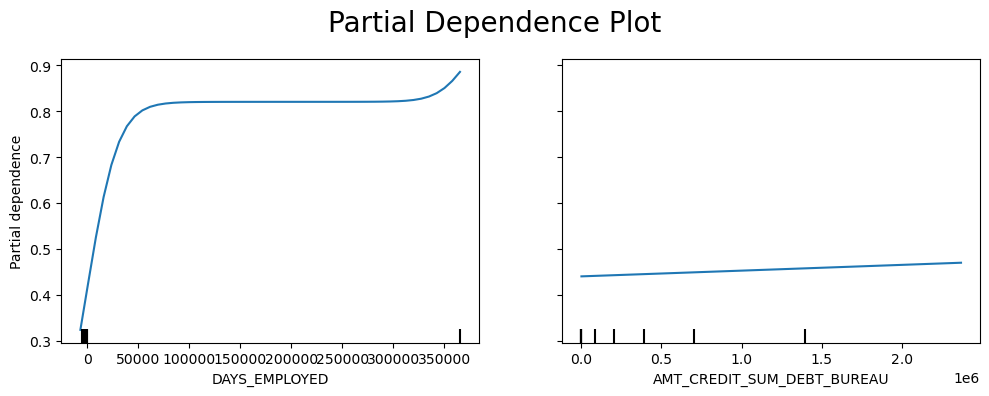

In [87]:
plot_partial_dependence_with_hue(lg2_grid, X_test, 
                                 [2, 11], grid_resolution=50, figsize=(10, 4))

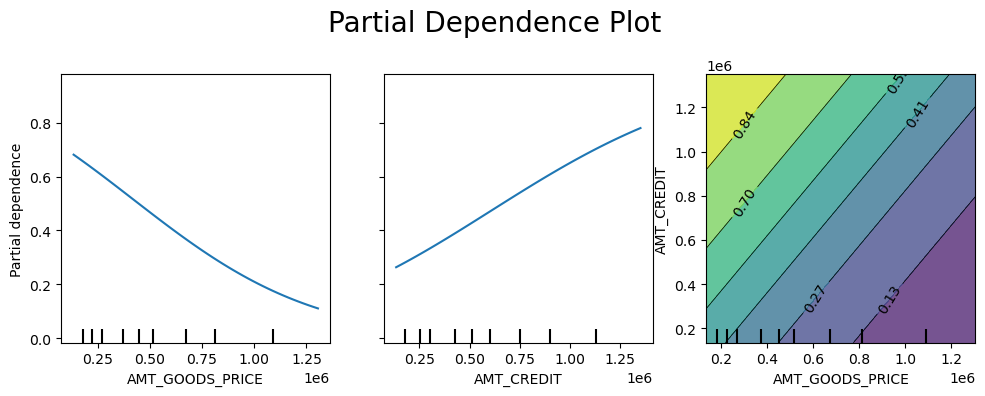

In [90]:
plot_partial_dependence_with_hue(lg2_grid, X_test, 
                                 [9, 15, (9, 15)], grid_resolution=50, figsize=(10, 4))

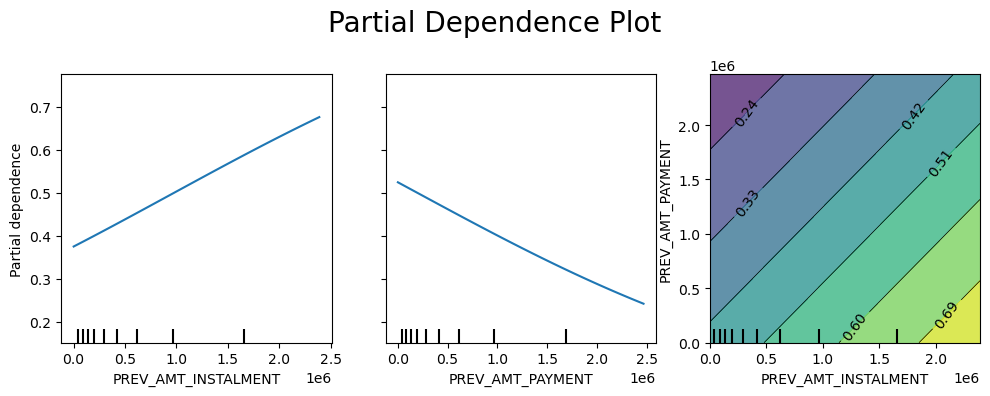

In [89]:
plot_partial_dependence_with_hue(lg2_grid, X_test, 
                                 [10, 5, (10, 5)], grid_resolution=50, figsize=(10, 4))

# Business Impact on Default Rate

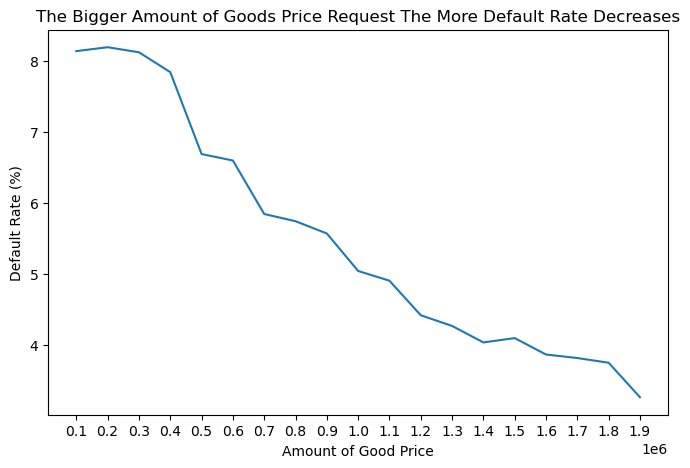

In [71]:
credit = [i for i in range(100000, 2000000, 100000)]
default_rate = []

for i in credit:
    val_counts = raw_train_df[raw_train_df['AMT_GOODS_PRICE'] >= i]['TARGET'].value_counts()
#     print(val_counts)
    default_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

plt.figure(figsize = (8,5))
ax = sns.lineplot(x = credit, y = default_rate)
ax.set_xticks(credit);
ax.set_ylabel('Default Rate (%)')
ax.set_xlabel('Amount of Good Price');
ax.set_title('The Bigger Amount of Goods Price Request The More Default Rate Decreases');

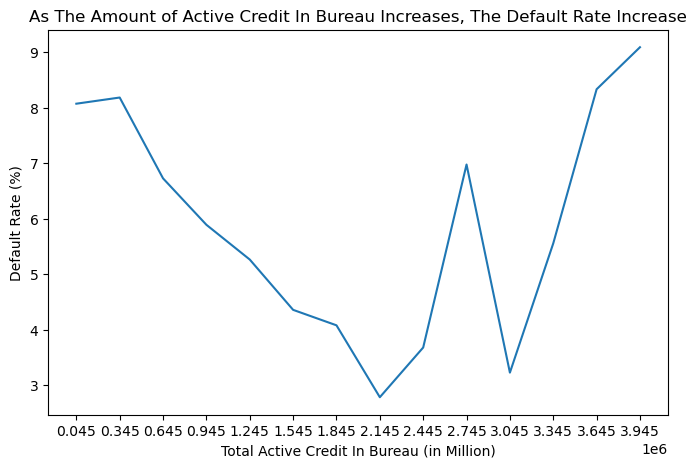

In [68]:
credit = [i for i in range(45000, 4000000, 300000)]
default_rate = []

for i in credit:
    val_counts = raw_train_df[raw_train_df['AMT_CREDIT'] >= i]['TARGET'].value_counts()
#     print(val_counts)
    default_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

plt.figure(figsize = (8,5))
ax = sns.lineplot(x = credit, y = default_rate)
ax.set_xticks(credit);
ax.set_ylabel('Default Rate (%)')
ax.set_xlabel('Total Active Credit In Bureau (in Million)');
ax.set_title('As The Amount of Active Credit In Bureau Increases, The Default Rate Increase');

In [72]:
credit

[100000,
 200000,
 300000,
 400000,
 500000,
 600000,
 700000,
 800000,
 900000,
 1000000,
 1100000,
 1200000,
 1300000,
 1400000,
 1500000,
 1600000,
 1700000,
 1800000,
 1900000]

In [73]:
default_rate

[8.132679449558495,
 8.187733461862875,
 8.11658374710932,
 7.836971606053264,
 6.68378606106809,
 6.592943371181546,
 5.83988583261046,
 5.738274098857396,
 5.565833566043005,
 5.038248483249802,
 4.900839677198027,
 4.414271105556187,
 4.264324973150546,
 4.031936127744511,
 4.093144344807636,
 3.861880963198546,
 3.8126090206827805,
 3.7461559966452334,
 3.260869565217391]

In [64]:
raw_train_df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64